In [1]:
import pandas as pd
import numpy as np

In [2]:
comments = pd.read_csv('../data/comments_lang.csv')
comments_en = comments[comments.lang == 'en']

In [4]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [5]:
from sklearn.neural_network import BernoulliRBM

In [13]:
vect = CountVectorizer(ngram_range = (1,3), stop_words = 'english', min_df = 50, max_df = 0.95).fit(comments_en.Review)

In [14]:
feats = vect.transform(comments_en.Review)

In [15]:
feats.shape

(19782, 517)

In [27]:
rbm = BernoulliRBM(n_components = 512)
rbm = rbm.fit(feats)

In [28]:
rbm_feats = rbm.transform(feats)

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components = 5).fit(rbm_feats)

In [31]:
y = pca.transform(rbm_feats)

<IPython.core.display.Javascript object>


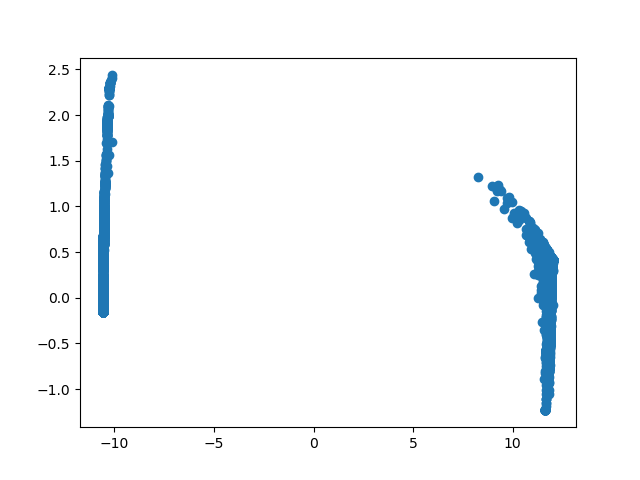

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(y[:,0], y[:,1])

In [41]:
comments_en.loc[:,'y0'] = y[:,0]

/Users/dns/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
comments_en[comments_en.y0>0].Review.to_csv('rbm_pos.csv')
comments_en[comments_en.y0<0].Review.to_csv('rbm_neg.csv')